In [1]:
%config InlineBackend.figure_format = "svg"

from dn import BinaryActionNode, BinaryUtilityNode, DecisionNetwork
from bn import BinaryNode
import pandas as pd
import time

# Decision Networks

## Creating the decision network structure

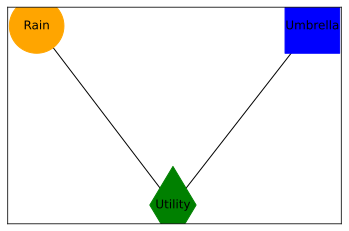

In [2]:
dn = DecisionNetwork()
dn.add_nodes(["Rain"])
dn.add_action_node("Umbrella", [0, 1])
dn.add_utility_node("Utility")
dn.add_edges([("Rain", "Utility"), ("Umbrella", "Utility")])
dn.draw()

## Populate the Decision Network with data

In [3]:
# Add data for node Rain
data = {"Rain": [0,1], "Prob": [0.8, 0.2]}
dn.add_node_pt("Rain", pd.DataFrame(data))

# Add data for node utility
data = {"Rain": [0,0,0,0,1,1,1,1], "Umbrella": [0,0,1,1,0,0,1,1], "Utility": [0,1,0,1,0,1,0,1], "Prob":[0,1,1,0,1,0,0,1]}
dn.add_node_pt("Utility", pd.DataFrame(data))

## Classical query for the best decision

In [4]:
dn.query_decision(query="Utility", evidence={"Rain": 1}, n_samples=100)

{'Umbrella': 1}

## Quantum-Classical query for the best decision

In [5]:
dn.query_decision(query="Utility", evidence={"Rain": 1}, n_samples=100, quantum=True)

{'Umbrella': 1}